**Operaciones Morfológicas sobre Imágenes Binarias**

**Operaciones Fundamentales: erosión y dilatación (son filtros no lineales)**

Se utiliza en todos los casos un **elemento estructurante** (sería como un kernel o máscara) de forma variable. El elemento estructurante se conoce como **EE** o también **SE** (Structuring Element).

El **EE** define los píxeles que se usan en la operación y los que no.

El **EE** tiene un punto que hará las veces de pivote, considerado origen. En general el punto central es el pivote en **EE** de ancho y alto impar.

Lo más habitual es emplear **EE** isotrópicos, es decir que no privilegian ninguna dirección.

Los **EE** clásicos son los llamados de 8 vecinos y 4 vecinos (cruz)

Estos son simétricos y no priorizan ninguna dirección y el pivote es el elemento central.

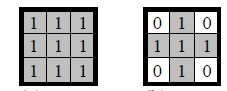




Aplicado a imágenes binarias: 

La **erosión** reduce la superficie de las regiones blancas (objetos).

La **dilatación** amplía o completa las supeerficies blancas.

• Dado un elemento estructurante, EE, de cierta forma y tamaño, y una imagen binaria X, recorriendo cada pixel de la imagen y superponiendo el EE donde el pivote coincida con el pixel en cuestión, se definen las dos operaciones:

– **Dilatación** (notación: X⊕EE): Calcular el valor **máximo** de los pixeles de X que coincidan los lugares (o 1's) del **EE** reflejado (para binarias logical el operador es OR).

– **Erosión** (notación: X⊗EE): Calcular el valor **mínimo** de los pixeles de X que coincidan los lugares (o 1's) del **EE** reflejado (para binarias logical el operador es AND).


Cuando el **EE** es simétrico (como el caso de los 4 u 8 vecinos) no es necesario reflejarlo


**Es equivalente (y se puede generalizar para imágenes grises o de color):**

**Dilatación** $\leftrightarrow$ **Filtro de Máximo** sobre los lugares definidos por el EE (como 1's).

• Es decir, para imágenes binarias, cada punto en donde la intersección de la imagen con el EE reflejado haya algún uno, se asignará por 1 (en el punto donde está posicionado el pivote del EE), sino valdrá 0.

Al dilatar las regiones blancas aumentan su tamaño, pero pueden perderse detalles de la forma. Se rellenan intersticios de las regiones y también, como efecto muchas veces pernicioso, se pueden fusionar objetos diferentes que se encuentren próximos entre si. Cuando el elemento estructurante es grande el efecto es más acusado.

**Erosión** $\leftrightarrow$ **Filtro de Mínimo** sobre los lugares definidos por el EE (como 1's).

• Es decir, para imágenes binarias, cada punto en donde la intersección de la imagen con el EE reflejado hayan todos uno, se asignará por 1 (en el punto donde está posicionado el pivote del EE), sino valdrá 0.

Esta operación reduce el tamaño de los objetos/regiones blancas. Se erosionará o eliminará de la región, es decir se colocará como 0, cada pixel centrado en el pivote que tenga algún cero en los lugares definidos por el EE (pues el mínimo dará 0).

Los intersticios se agrandan, la separación entre objetos crece, elementos pequeños de la imagen pueden desaparecer por lo que es muy útil para eliminar ruido impulsional o de pequeño tamaño. 

**Aunque el efecto es contrario al de la dilatación esto NO debe llevar al error de considerar que erosionando una imagen dilatada seremos capaces de recuperar la imagen original, esto NO es así. NO son operaciones reversibles, y menos una la inversa de la otra**


Dada una imagen con regiónes A, y un elemento estructural EE , (ambos imágenes binarias,  la erosión de una imagen, por EE, es el conjunto de todos los elementos para los cuales EE trasladado por x está completamente contenido en A.


Se suele emplear acompañada de otras operaciones morfológicas para contrarrestar los efectos no deseables que produce.


En la erosión se realiza un AND con los unos del EE. Si las regiones son menores que el elemento estructurante, estos desaparecerán. 


**Ni la operación dilatación ni la operación erosión son reversibles (inversibles).**


### Dos Ejemplos de Erosión con diferentes EE:

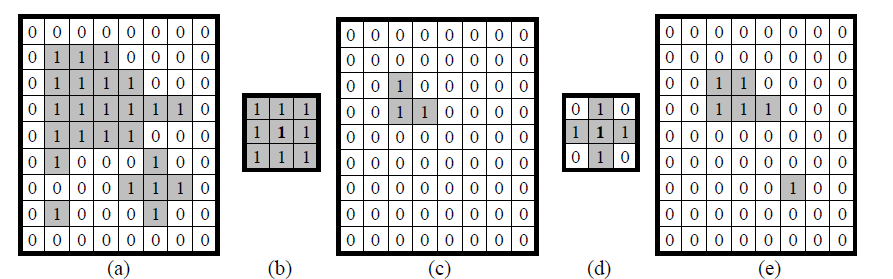

(c) se obtuvo erosionando (a) por EE (b) y (e) erosionando (a) con el EE (d).


#### OpenCV

**Función del opencv que permite crear elementos estructurantes distintos del rectangular o cuadrado que se crean con np.ones()**

    cv2.getStructuringElement()

 kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
 
 array(
 
       [[0, 0, 1, 0, 0],
 
       [1, 1, 1, 1, 1],
 
       [1, 1, 1, 1, 1],
       
       [1, 1, 1, 1, 1],
       
       [0, 0, 1, 0, 0]], dtype=uint8)


 kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

|array(
 
       [[0, 0, 1, 0, 0],
       
        [0, 0, 1, 0, 0],
       
        [1, 1, 1, 1, 1],
       
        [0, 0, 1, 0, 0],
       
        [0, 0, 1, 0, 0]], dtype=uint8)
 
 
 kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3))
 
 [[1 1 1 1 1]
 
 [1 1 1 1 1]
 
 [1 1 1 1 1]]
 


In [1]:
import cv2

In [2]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 5))
print(kernel,type(kernel),type(kernel[0,0]))

[[0 0 0 0 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 0]
 [0 0 0 0 1 0 0 0 0]] <class 'numpy.ndarray'> <class 'numpy.uint8'>


**Ejercicio:**

Calcular 2 o 3 elementos estructurantes diferentes, isotrópicos, con pivote central y 10 vecinos o más cada uno.

#### Erosionamos y dilatamos una imagen binaria usando Funciones del OpenCV

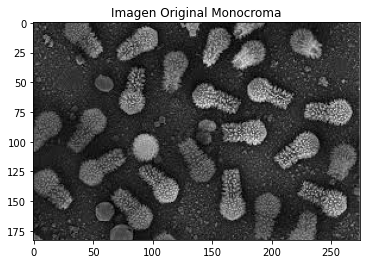

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./imagenes/microorganismos.jpeg',0) #primero leemos una imagen en grises
plt.imshow(img,cmap='gray'),plt.title('Imagen Original Monocroma')
plt.show()

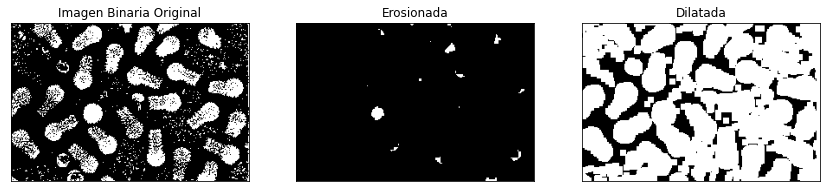

In [4]:
#la binarizamos con umbral automático (Por el método de Otsu)
umbral_otsu,img_binaria = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((7,7),np.uint8)#creamos el elemento estructurante 

bin_erosionada = cv2.erode(img_binaria,kernel,iterations = 1)# erosionamos la imagen binaria
bin_dilatada = cv2.dilate(img_binaria,kernel,iterations = 1) #dilatamos la imagen binaria

#graficamos: imagen binaria, erosionada y dilatada
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(img_binaria,cmap='gray'),plt.title('Imagen Binaria Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(bin_erosionada,cmap='gray'),plt.title('Erosionada'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(bin_dilatada,cmap='gray'),plt.title('Dilatada'),plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('erosionada.png',erosion)
#cv2.imwrite('dilatada.png',dilatacion)

**Ejercicio:** Repita el ejercicio anterior pero cambiando el elemento estructurante por uno que crea más adecuado al problema.

**Apertura**

**Erosión seguida de Dilatación.**

Al erosionar se pierden detalles pequeños (ruidos), pero la imagen se achica. Si luego la dilatamos se expande y podemos volverla de tamaño similar a la original, ya sin los detalles molestos.


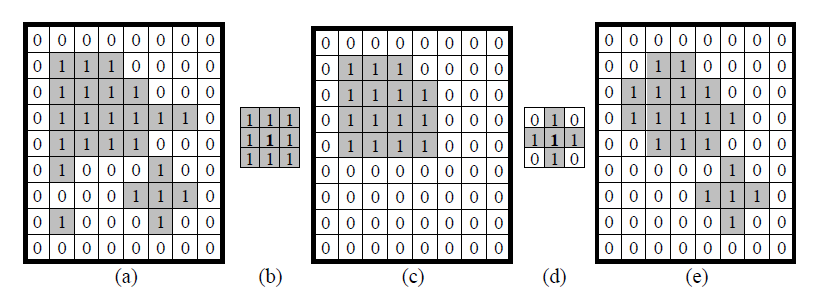

La imagen (c) se obtiene abriendo sobre (a) con EE (b). La imagen (e), abriendo sobre (a) con EE (d).

Se puede ver que son **todos** los puntos de la imagen original que coinciden con el EE. Vemos que sacó puntos molestos.


#### Ejemplo Apertura

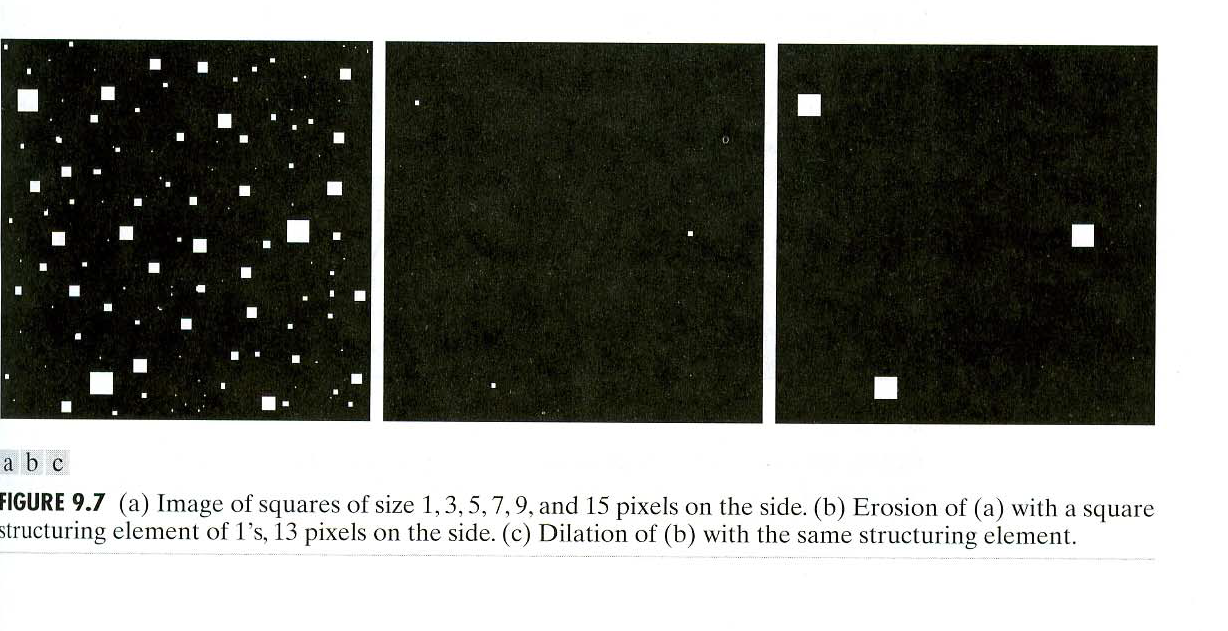

**Cierre**

Dilatación seguida de Erosión.

Al dilatar se cierran insterticios, pero la imagen crece. Al erosionar luego, vuelve a un tamaño similar al original.


#### Ejemplo Cierre

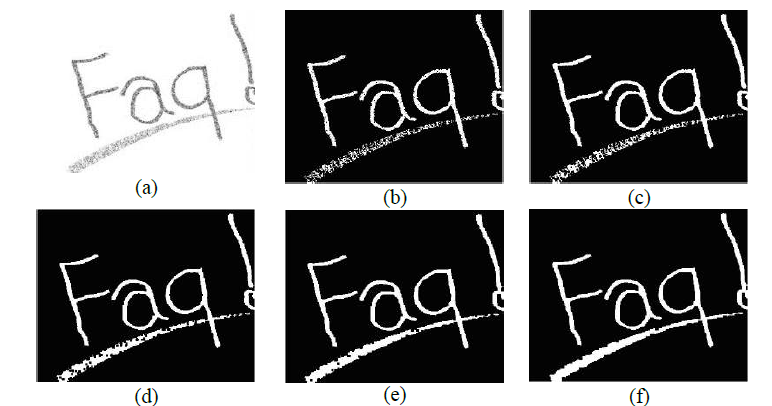

Imagen en gris, binarizada, cierre de la misma con EE de 3,5,7 y 9 de lado. Con 9 rellena más.


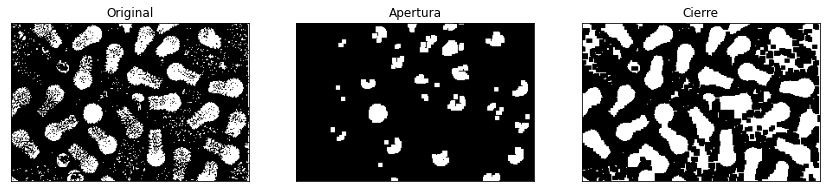

In [5]:
#Operaciones de apertura y cierre- Funciones del OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

imga = cv2.imread('./imagenes/microorganismos.jpeg',0)
ret,img = cv2.threshold(imga,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

kernel = np.ones((5,5),np.uint8)
apertura = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cierre = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(img,cmap='gray'),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(apertura,cmap='gray'),plt.title('Apertura'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(cierre,cmap='gray'),plt.title('Cierre'),plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imwrite('abierta.png',apertura)
#cv2.imwrite('cerrada.png',cierre)


**Ejercicio:** Combine, ambas operaciones, por ejemplo: cierre y luego apertura o apertura y luego cierre. Elija el que crea más adecuado para mejorar los resultados o aplique ambos y compare.

[[0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]
[0 1]


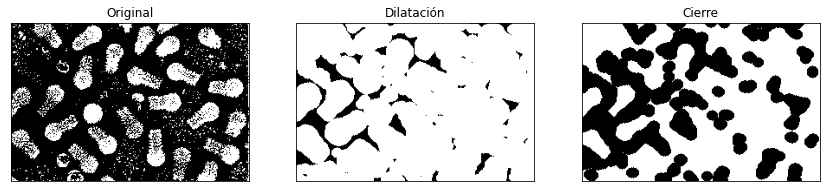

In [6]:
#Implementación del ejemplo dado de apertura- Imagen cuadrados.tif
import cv2
import numpy as np
import matplotlib.pyplot as plt

imga = cv2.imread('./imagenes/microorganismos.jpeg',0)
ret,img_bin = cv2.threshold(imga,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#Elementos de hasta 15 píxeles de lado
#kernel = np.ones((13,13),np.uint8)
kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13, 13))
print(kernel)

dilatacion=cv2.dilate(img_bin,kernel,iterations=1)
cierre = cv2.erode(dilatacion,kernel,iterations = 1)
print(np.unique(img_bin))

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,3,1), plt.imshow(img_bin,cmap='gray'),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(dilatacion,cmap='gray'),plt.title('Dilatación'),plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(cierre,cmap='gray'),plt.title('Cierre'),plt.xticks([]), plt.yticks([])
plt.show()


**Extracción de Contornos**

Contorno Exterior = Dilatación - Imagen_Binaria

Contorno Interior= Imagen_Binaria - Erosión

Gradiente Morfológico= Dilatación - Erosión


[  0 255]


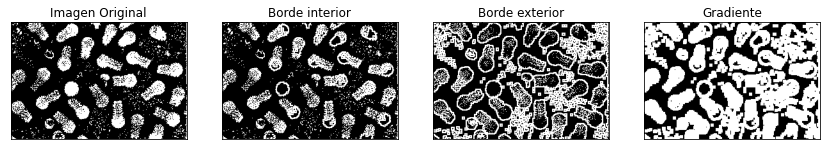

In [7]:
#Tomamos una imagen de la letra A y mostramos contornos y gradiente morfológico

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./imagenes/microorganismos.jpeg',0)#lee la imagen en grises
ret,img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(np.unique(img_bin))

kernel = np.ones((5,5),np.uint8)#crea el elemento estructurante
erosion = cv2.erode(img_bin,kernel,iterations = 1)
dilatacion = cv2.dilate(img_bin,kernel,iterations = 1)
gradiente=cv2.morphologyEx(img_bin,cv2.MORPH_GRADIENT,kernel)

fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.subplot(1,4,1), plt.imshow(img_bin,cmap='gray'),plt.title('Imagen Original'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2),plt.imshow(img_bin-erosion,cmap='gray'),plt.title('Borde interior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(dilatacion-img_bin,cmap='gray'),plt.title('Borde exterior'),plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(gradiente,cmap='gray'),plt.title('Gradiente'),plt.xticks([]), plt.yticks([])
plt.show()

#### Otras Aplicaciones (Opcional)

**Hit and Miss**
Busca una forma en una imagen.

**Ejemplo**
Busca esquinas:
EE, unos y ceros deben cumplirse!

Los otros son "no importa" 

cuatro tipos de esquinas:

 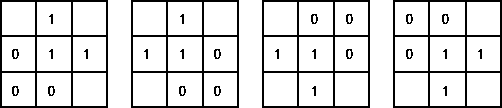

**Otro ejemplo:**

Se quiere encontrar las T exactas de la siguiente imagen. En Python, con OpenCV:

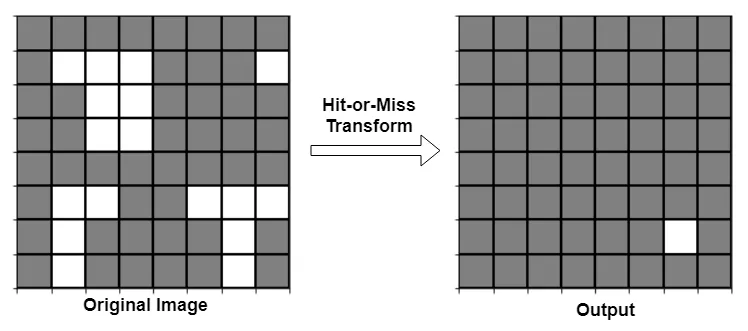

**Esqueletización**
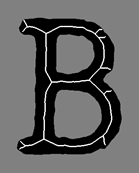


Este es un procedimiento para obtener un descriptor de una región mediante un grafo, la idea es que
dos objetos diferentes tendrán distinto grafo, que ocupan mucho menos espacio de almacenamiento
que la región y que son también más fáciles de procesar y comparar.

Suele ilustrarse el efecto de determinación del esqueleto como el último frente de fuego que quedaría si se pudiera encender simultáneamente todo el perímetro de la región y asumimos que este fuego avanza uniformemente. 

**Obtener el esqueleto mediante el cálculo de distancias sería muy costoso computacionalmente por lo que se sustituye por otro más rápido basado en la utilización de filtros morfológicos, que pueden orientarse a trabajar con conectividades a 4 o a 8.**

A base de sucesivas iteraciones se iría adelgazando la imagen, hasta obtener el esqueleto cuando no haya diferencia entre dos iteraciones sucesivas.

En cada iteración deben respetarse 2 normas:
• No suprimir puntos extremos
• No debe romperse la conectividad


In [11]:
#Esqueletización con OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
imga = cv2.imread('./imagenes/rostro.jpeg',0)
size=np.size(imga) #cantidad de píxeles
skel = np.zeros(np.shape(imga),np.uint8)#variable que va a almacenar el esqueleto
ret,img = cv2.threshold(imga,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#ret,img = cv2.threshold(imga,127,255,0)#binarizo

element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))#elijo EE
print(element)


[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [12]:
done = False
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)#Hace apertura
    temp = cv2.subtract(img,temp)#resta imagen-apertura
    skel = cv2.bitwise_or(skel,temp)#or bit a bit entre el esqueleto temporal y el esqueleto definitivo
    img = eroded.copy()#copia la imagen erosionada y con ella seguirá trabajando
    zeros = size - cv2.countNonZero(img)#cuenta elementosceros
    if zeros==size:
        done = True #si la imagen erosionada ya no tiene elementos se terminó el proceso


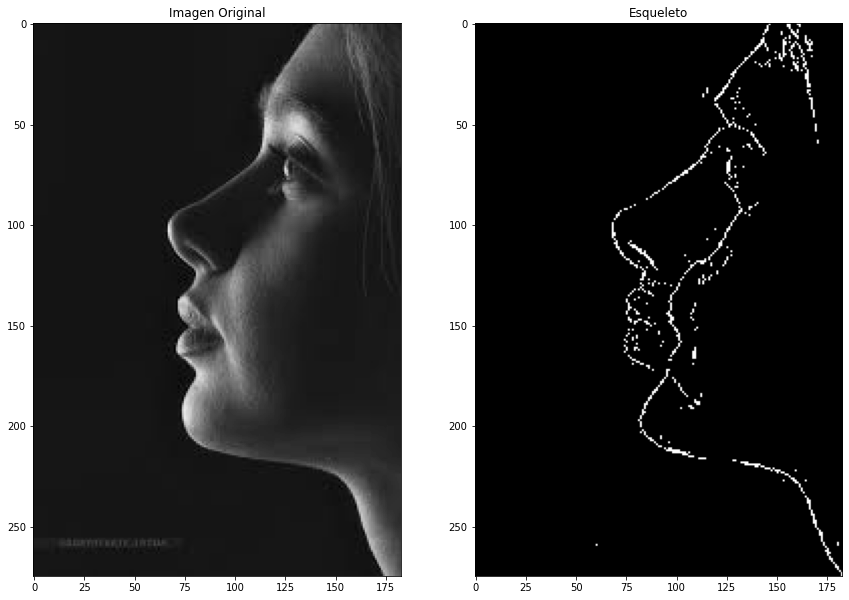

In [13]:
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)

plt.subplot(1,2,1), plt.imshow(imga,cmap='gray',vmin=0,vmax=255),plt.title('Imagen Original')
plt.subplot(1,2,2),plt.imshow(skel,cmap='gray'),plt.title('Esqueleto')
plt.show()

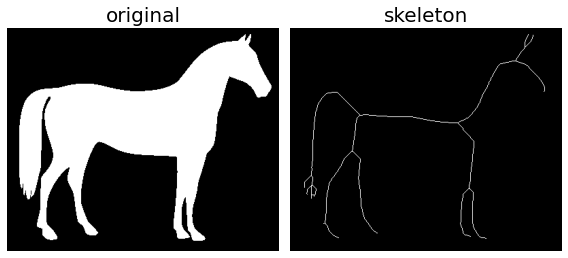

In [15]:
#Tener instalado scikit-image
#pip install scikit-image en el SO
#Muchas funciones de esta librería están en subpaquetes
from skimage import io
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

#Importa una imagen que tiene en su carpeta
horse=data.horse()
# Invert the horse image
image = invert(horse)#calcula el negativo/invierte los valores

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)
#ax = axes.ravel()
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)
ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)
fig.tight_layout()
plt.show()

**Otras aplicaciones**

Adelgazamiento

Engrosamiento

Etiquetado de componentes conexas

Segmentación

**Bibliografía**

González Woods, *Digital Image Processing*, Cuarta Edición, Ed. Pearson, 2018. O Tercera Edición, 2008.